# BIOINF 305. Assignment - week 42.
## Assem Maratova

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting some parameters for plots
plt.style.use('seaborn')
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
plt.rcParams['figure.figsize'] = 10 , 5  # default figure size
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title 

In [3]:
# Hill functions
def Hill_activator(x,K,n): 
    xn = np.power(x,n)
    Kn = np.power(K,n)
    f_X = xn/(Kn+xn)
    return f_X

def Hill_repressor(x,K,n): 
    f_X = 1.0 - Hill_activator(x,K,n)
    return f_X

# define negative feedback loop
def NFL(u,t,A,Bx,By,K,n):
    x,y = u
    dxdt = Bx*Hill_repressor(y,K,n) - A*x
    dydt = By*Hill_activator(x,K,n) - A*y
    return [dxdt,dydt]

In [4]:
# data for simulation
A, Bx = 1, 5
By = 5
K = 2.5
n = 5
time = np.linspace(0,8,1000)
initial_values = [[4.5,4], [4,4.5], [1, 0.5], [0.5, 1]]

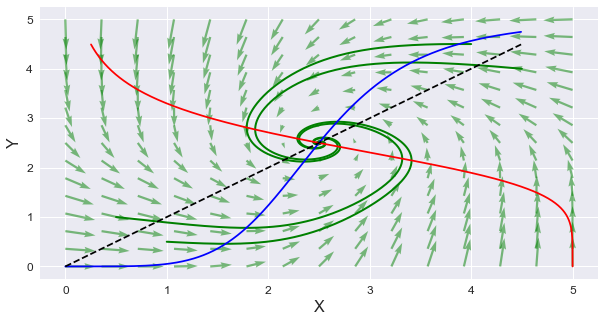

In [5]:
for i, u0 in enumerate(initial_values):
    U = odeint(NFL, u0, time,
               args=(A,Bx,By,K,n))
    plt.plot(U[:,0], U[:,1], c='g', ls='-', lw=2 )


plt.plot(time[time<=4.5],By*Hill_activator(time[time<=4.5],K,n), c='b')
plt.plot(Bx*Hill_repressor(time[time<=4.5],K,n), time[time<=4.5], c='r')
plt.plot(time[time<=4.5],time[time<=4.5], c='k', ls='--')

xs = np.linspace(0, 5, 15)
ys = np.linspace(0, 5, 15)

d_x = np.array([[Bx*Hill_repressor(y,K,n) - A * x for x in xs] for y in ys])
d_y = np.array([[By*Hill_activator(x,K,n) - A * y for x in xs] for y in ys])

plt.quiver(xs, ys, d_x, d_y, 
           alpha = 0.5, color='green')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [6]:
def Oscillation(u,t,Ax,Ay,Bx,By,K,n):
    x,y = u
    dxdt = Bx*Hill_repressor(y,K,n) - Ax*x
    dydt = By*Hill_activator(x,K,n) - Ay*y
    return [dxdt, dydt]

In [7]:
n = 10
K = 10
time = np.linspace(0,40)

In [8]:
U = odeint(Oscillation, [0,0], time, (0.15,0.1,4,4,K,n))

plt.plot(time, U[:,0], label='X')
plt.plot(time, U[:,1], label='Y')
plt.xlabel('Time')
plt.legend()
plt.show()

In [9]:
def step_x(x,y,K,A,B):
    if y < K:
        dxdt = B - A*x
    else:
        dxdt = - A*x
    return dxdt

def step_y(x,y,K,A,B):
    if x > K:
        dydt = B - A*y
    else:
        dydt = - A*y
    return dydt
    
def Linear_Oscillator(u,t,A,B,K):
    x,y = u
    
    dxdt = step_x(x,y,K,A,B)
    dydt = step_y(x,y,K,A,B)
    return [dxdt, dydt]

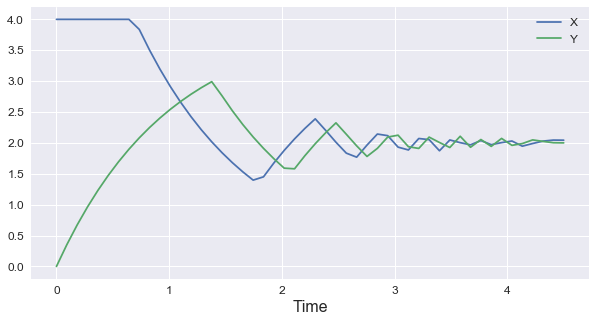

In [10]:
time = np.linspace(0,4.5)
A = 1
B = 4
K = 2

U = odeint(Linear_Oscillator,[4,0],time,(A,B,K))
plt.plot(time, U[:,0], label='X')
plt.plot(time, U[:,1], label='Y')
plt.legend()
plt.xlabel('Time')
plt.show()

In [11]:
def Repressilator(u, t, A, B, K, n):
    dudt = np.zeros_like(u)

    for i in range(len(u)):
        dudt[i] = B * Hill_repressor(u[i-1], K, n) - A*u[i]
    return dudt

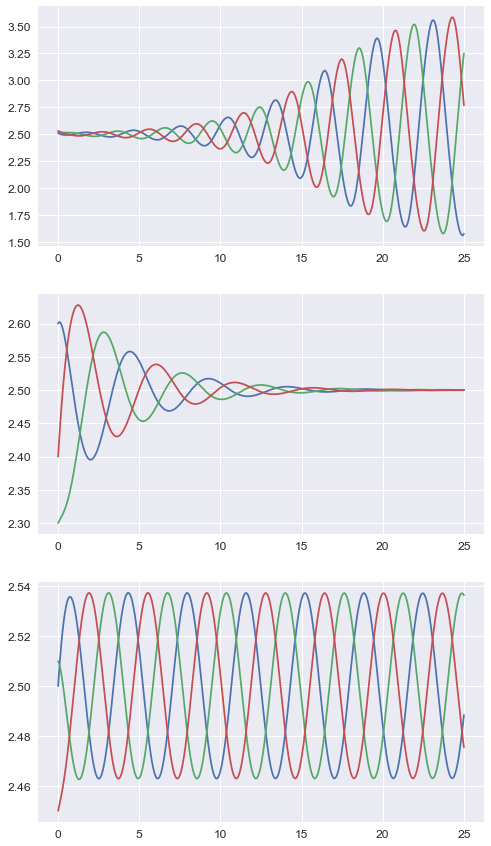

In [12]:
# data for simulation
A, B = 1, 5
K = 2.5
time = np.linspace(0,25,1000)

n = [5, 3, 4]
initial_values = [[2.51, 2.52, 2.53], 
                  [2.6, 2.3, 2.4],
                  [2.5, 2.51, 2.45]
                 ]

fig , ax = plt.subplots(len(n),1, figsize=[8, 15])
for i, u0 in enumerate(initial_values):
    U = odeint(Repressilator, u0, time,
               args=(A,B,K,n[i]))
    for j in range(len(u0)):
        ax[i].plot(time, U[:,j] )
        